In [106]:
import time

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def generate_and_save_triangulation(ind,num_points=100):
    # Generowanie losowych punktów
    np.random.seed()
    points = np.random.rand(num_points, 2)  # Generowanie określonej liczby punktów w 2D

    # Tworzenie triangulacji
    tri = Delaunay(points)

    # Zapis punktów do pliku
    with open('test' + ind + 'points' , 'w') as file:
        for point in points:
            file.write(f"{point[0]} {point[1]}\n")

    # Zapis trójkątów do pliku
    with open('test' + ind + 'triangles', 'w') as file:
        for triangle in tri.simplices:
            file.write(f"{triangle[0]} {triangle[1]} {triangle[2]}\n")

    # Wizualizacja
    plt.triplot(points[:, 0], points[:, 1], tri.simplices)
    plt.plot(points[:, 0], points[:, 1], 'o')
    plt.show()

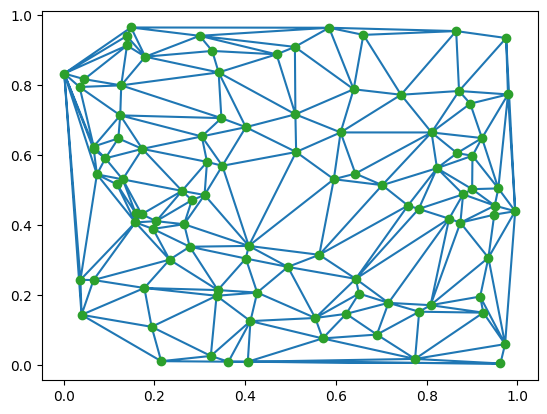

In [135]:
generate_and_save_triangulation('3')

In [107]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [108]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        if (points[ind1],points[ind2]) not in segments and (points[ind2],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind2]))
        if (points[ind1],points[ind3]) not in segments and (points[ind3],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind3]))
        if (points[ind2],points[ind3]) not in segments and (points[ind3],points[ind2]) not in segments:
            segments.append((points[ind2],points[ind3]))
    return segments

Lista wierzchołków + Lista połączeń

In [109]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        if (i,ii) not in connections and (ii,i) not in connections:
            connections.append((i,ii))
        if (i,iii) not in connections and (iii,i) not in connections:
            connections.append((i,iii))
        if (ii,iii) not in connections and (iii,ii) not in connections:
            connections.append((ii,iii))
    return connections

In [136]:
p,t = triangulation_reader('3')
con = triangles_to_connections(t)
vertex_and_connections = (p,con)
print(vertex_and_connections)

([(0.40804785859131676, 0.34039223274342245), (0.9500709442503077, 0.4555731147777652), (0.5544944338770323, 0.13445126997859735), (0.9179638353514171, 0.19570085216388022), (0.6903374072581155, 0.08704011520753652), (0.8495064551888681, 0.41831169445494676), (0.810810298230029, 0.6646563190234671), (0.9792867431705177, 0.77338087957195), (0.49414927352352755, 0.2803720680408476), (0.32749307011060136, 0.897603596969329), (0.19697088362083492, 0.3889555474503861), (0.5708108236977775, 0.07603667045334106), (0.3398619778409675, 0.21414091342882413), (0.9361094270897984, 0.306680792109038), (0.20406074783057038, 0.4111535486989282), (0.6430066165356078, 0.5470452501235455), (0.8650966023194396, 0.9543659230992368), (0.06638177588016625, 0.6161988534161567), (0.8086417667840512, 0.17105314699090246), (0.03947762456195103, 0.1434551993846409), (0.2655087305937359, 0.402405725264252), (0.5634225145096695, 0.31500767980600597), (0.2779460995906944, 0.3380696285862226), (0.9625990624196572, 0

Half Edge 

In [111]:
from halfedge import *
from visualizer import *

In [137]:
print(t)
print(p)
mesh = triangles_to_segments(p,t)
he = create_half_edge_structure(p, t)
print(len(he))
for h in he:
    print((h.vertex.cords, h.next.vertex.cords))

[(19, 64, 85), (64, 52, 85), (58, 76, 28), (76, 93, 28), (52, 17, 85), (17, 95, 85), (64, 61, 52), (59, 37, 52), (37, 59, 97), (61, 59, 52), (59, 61, 97), (47, 66, 85), (34, 53, 85), (66, 34, 85), (91, 96, 38), (43, 91, 38), (87, 91, 43), (32, 7, 94), (7, 96, 94), (96, 7, 38), (40, 16, 69), (62, 39, 37), (42, 80, 73), (30, 58, 82), (58, 30, 76), (30, 80, 42), (30, 88, 76), (88, 30, 42), (77, 39, 33), (39, 77, 37), (95, 77, 33), (17, 77, 95), (37, 77, 52), (77, 17, 52), (14, 61, 10), (81, 61, 64), (81, 64, 19), (95, 79, 85), (79, 47, 85), (25, 90, 23), (72, 25, 23), (49, 72, 23), (56, 90, 25), (91, 60, 96), (60, 87, 86), (60, 91, 87), (6, 43, 38), (6, 87, 43), (6, 40, 82), (39, 84, 93), (84, 39, 62), (93, 84, 28), (84, 70, 28), (70, 84, 62), (46, 93, 76), (88, 46, 76), (9, 42, 73), (9, 88, 42), (47, 29, 66), (79, 29, 47), (29, 46, 88), (36, 40, 69), (30, 36, 80), (40, 36, 82), (36, 30, 82), (80, 75, 73), (75, 53, 73), (75, 36, 69), (36, 75, 80), (16, 75, 69), (48, 14, 62), (48, 37, 97),

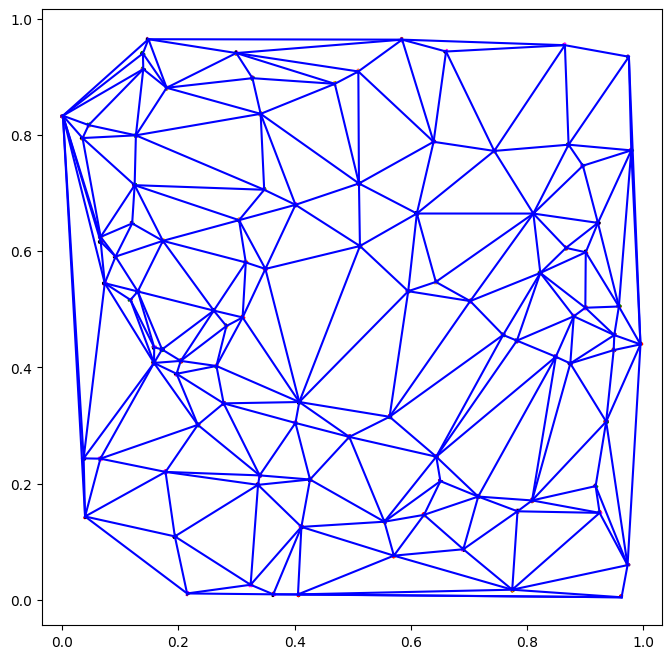

In [138]:
draw_halfedge_structure(he,mesh)

In [114]:
def apex_surroundings_basic(point, points, connections):
    surrounding = []
    for i,j in connections:
        if i == point:
            if j not in surrounding:
                surrounding.append(j)
            for a,b in connections:
                if a == j and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == j and a != point and a not in surrounding:
                    surrounding.append(a)
        elif j == point:
            if i not in surrounding:
                surrounding.append(i)
            for a,b in connections:
                if a == i and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == i and a != point and a not in surrounding:
                    surrounding.append(a)
    return surrounding

In [115]:
start_time = time.time()
sur = apex_surroundings_basic(2, p, con)
end_time = time.time()
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)
print(end_time-start_time)

[0, 1, 7, 6, 3, 4, 5]
[(1.0, 1.0), (2.0, 6.5), (6.0, 12.0), (11.5, 12.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0)]
3.8623809814453125e-05


In [116]:
import copy

def triangle_surroundings_basic(tri_id, triangles):
    triangle = triangles[tri_id]
    surrounding = []
    for i,(t1,t2,t3) in enumerate(triangles):
        if i != tri_id and (t1 in triangle or t2 in triangle or t3 in triangle):
            if i not in surrounding:
                surrounding.append(i)
    res = copy.copy(surrounding)
    for j in surrounding:
        temp_triangle = triangles[j]
        for k,(t1,t2,t3) in enumerate(triangles):
            if k != tri_id and (t1 in temp_triangle or t2 in temp_triangle or t3 in temp_triangle):
                if k not in res:
                    res.append(k)
    return surrounding, res

In [117]:
tri = triangle_surroundings_basic(0,t)
print(tri)

([1, 2, 3], [1, 2, 3, 4, 5])


In [118]:
def apex_surroundings_halfedge(p,halfedges):
    surrounding = []
    hes = []
    for halfe in halfedges:
        if halfe.vertex.index == p:
            hes.append(halfe)
    if not hes:
        return surrounding
    for he in hes:
        he = he.next
        if he.vertex.index not in surrounding:
            while he:
                if he.vertex.index not in surrounding:
                    surrounding.append(he.vertex.index)
                he = he.next
                if he.vertex.index == p:
                    he = he.twin
    n = len(surrounding)
    for i in range(n):
        s = surrounding[i]
        hes = []
        for halfe in halfedges:
            if halfe.vertex.index == s:
                hes.append(halfe)
        if not hes:
            continue
        for he in hes:
            he = he.next
            if he.vertex.index not in surrounding:
                while he:
                    if he.vertex.index not in surrounding + [p]:
                        surrounding.append(he.vertex.index)
                    he = he.next
                    if he.vertex.index == s:
                        he = he.twin
                    
    return surrounding
    

In [119]:
start_time = time.time()
sur = apex_surroundings_halfedge(2, he)
end_time = time.time()
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)
print(end_time-start_time)

[1, 0, 7, 6, 3, 4, 5]
[(2.0, 6.5), (1.0, 1.0), (6.0, 12.0), (11.5, 12.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0)]
7.796287536621094e-05
